In [91]:
# Import dependencies
import pandas as pd
from sodapy import Socrata

# Load Data

In [92]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("chronicdata.cdc.gov", None)

In [93]:
# Return results as csv from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("swc5-untb", limit=2000000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

# View all columns in dataframes
pd.set_option('display.max_columns', None)  

# Display dataframe
results_df.head()

,year,stateabbr,statedesc,locationname,datasource,category,measure,data_value_unit,data_value_type,data_value,low_confidence_limit,high_confidence_limit,totalpopulation,locationid,categoryid,measureid,datavaluetypeid,short_question_text,geolocation,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8
0,2020,WY,Wyoming,Teton,BRFSS,Health Status,Physical health not good for >=14 days among a...,%,Crude prevalence,7.3,6.4,8.2,23497,56039,HLTHSTAT,PHLTH,CrdPrv,Physical Health,"{'type': 'Point', 'coordinates': [-110.426087,...",14,3126
1,2020,WY,Wyoming,Goshen,BRFSS,Health Status,Fair or poor self-rated health status among ad...,%,Crude prevalence,13.8,12.0,15.8,13235,56015,HLTHSTAT,GHLTH,CrdPrv,General Health,"{'type': 'Point', 'coordinates': [-104.3535403...",14,890
2,2020,WY,Wyoming,Laramie,BRFSS,Prevention,"Fecal occult blood test, sigmoidoscopy, or col...",%,Age-adjusted prevalence,61.6,58.5,64.6,100595,56021,PREVENT,COLON_SCREEN,AgeAdjPrv,Colorectal Cancer Screening,"{'type': 'Point', 'coordinates': [-104.660395,...",14,3119
3,2020,WY,Wyoming,Park,BRFSS,Prevention,Visits to doctor for routine checkup within th...,%,Crude prevalence,71.0,70.0,72.0,29331,56029,PREVENT,CHECKUP,CrdPrv,Annual Checkup,"{'type': 'Point', 'coordinates': [-109.5935975...",14,3122
4,2020,WY,Wyoming,Lincoln,BRFSS,Health Outcomes,Chronic obstructive pulmonary disease among ad...,%,Age-adjusted prevalence,5.9,5.1,6.8,20253,56023,HLTHOUT,COPD,AgeAdjPrv,COPD,"{'type': 'Point', 'coordinates': [-110.6829614...",14,3120


# General Data Overview

In [94]:
# View how many years worth of data we have
results_df['year'].unique()

array(['2020', '2019'], dtype=object)

In [95]:
# View null values by year
results_df.isnull().sum()

year                              0
stateabbr                         0
statedesc                         0
locationname                     60
datasource                        0
category                          0
measure                           0
data_value_unit                   0
data_value_type                   0
data_value                        0
low_confidence_limit              0
high_confidence_limit             0
totalpopulation                   0
locationid                        0
categoryid                        0
measureid                         0
datavaluetypeid                   0
short_question_text               0
geolocation                      60
:@computed_region_bxsw_vy29    1192
:@computed_region_he4y_prf8     660
dtype: int64

In [96]:
# Check data types for results_df
results_df.dtypes

year                           object
stateabbr                      object
statedesc                      object
locationname                   object
datasource                     object
category                       object
measure                        object
data_value_unit                object
data_value_type                object
data_value                     object
low_confidence_limit           object
high_confidence_limit          object
totalpopulation                object
locationid                     object
categoryid                     object
measureid                      object
datavaluetypeid                object
short_question_text            object
geolocation                    object
:@computed_region_bxsw_vy29    object
:@computed_region_he4y_prf8    object
dtype: object

In [97]:
# View health categories - (which include metrics we could use as features for machine learning)
results_df['category'].unique()

array(['Health Status', 'Prevention', 'Health Outcomes',
       'Health Risk Behaviors'], dtype=object)

In [98]:
# View contributing health metrics (possible features for machine learning)
results_df.loc[results_df['category'].isin(['Prevention', 'Health Risk Behaviors', 'Health Status'])]['measureid'].unique()

array(['PHLTH', 'GHLTH', 'COLON_SCREEN', 'CHECKUP', 'DENTAL',
       'CHOLSCREEN', 'CSMOKING', 'MHLTH', 'ACCESS2', 'BINGE', 'LPA',
       'SLEEP', 'COREW', 'CERVICAL', 'MAMMOUSE', 'BPMED', 'COREM'],
      dtype=object)

In [99]:
# View disease outcomes (possible targets for machine learning)
# This analysis will focus on COPD (Chronic Obstructive Pulmonary Disease)
# However, this notebook will make it easy to analyze other diseases
results_df['measureid'].unique()

array(['PHLTH', 'GHLTH', 'COLON_SCREEN', 'CHECKUP', 'COPD', 'CASTHMA',
       'TEETHLOST', 'CANCER', 'DENTAL', 'STROKE', 'CHOLSCREEN',
       'CSMOKING', 'MHLTH', 'OBESITY', 'DIABETES', 'ARTHRITIS', 'ACCESS2',
       'BINGE', 'LPA', 'CHD', 'KIDNEY', 'BPHIGH', 'HIGHCHOL', 'SLEEP',
       'COREW', 'CERVICAL', 'MAMMOUSE', 'BPMED', 'DEPRESSION', 'COREM'],
      dtype=object)

# Prepare Dataframe

In [100]:
# Create a list of columns from results_df we want to convert from object to numeric
# This will allow us to perform calculations on the data
numeric_list = ['year', 'data_value', 'low_confidence_limit', 'high_confidence_limit', 'totalpopulation']

# Convert columns in numeric_list to numeric data type in results_df
results_df[numeric_list] = results_df[numeric_list].apply(pd.to_numeric, errors='coerce')

# View data types for results_df
results_df.dtypes

year                             int64
stateabbr                       object
statedesc                       object
locationname                    object
datasource                      object
category                        object
measure                         object
data_value_unit                 object
data_value_type                 object
data_value                     float64
low_confidence_limit           float64
high_confidence_limit          float64
totalpopulation                  int64
locationid                      object
categoryid                      object
measureid                       object
datavaluetypeid                 object
short_question_text             object
geolocation                     object
:@computed_region_bxsw_vy29     object
:@computed_region_he4y_prf8     object
dtype: object

In [101]:
# Create a list of the health metrics which will become our features and make them into dataframes
# And print the feature and the measure of each dataframe as a key to more easily understand the data

# Add the health outcomes to a list
features_list = results_df.loc[results_df['category'].isin(['Prevention', 'Health Risk Behaviors', 'Health Status'])]['measureid'].unique()

# Create unique dataframes for each feature in the features_list
for feature in features_list:
    globals()[feature + "_df"] = results_df.loc[results_df['measureid'] == feature]

# Create a list that contains the names of the dataframes made in the step above
dataframes_list = [feature + "_df" for feature in features_list]

# Print the feature and the measure of each dataframe
for dataframe in dataframes_list:
    print(f"{dataframe} - {globals()[dataframe]['measure'].unique()}")

PHLTH_df - ['Physical health not good for >=14 days among adults aged >=18 years']
GHLTH_df - ['Fair or poor self-rated health status among adults aged >=18 years']
COLON_SCREEN_df - ['Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years']
CHECKUP_df - ['Visits to doctor for routine checkup within the past year among adults aged >=18 years']
DENTAL_df - ['Visits to dentist or dental clinic among adults aged >=18 years']
CHOLSCREEN_df - ['Cholesterol screening among adults aged >=18 years']
CSMOKING_df - ['Current smoking among adults aged >=18 years']
MHLTH_df - ['Mental health not good for >=14 days among adults aged >=18 years']
ACCESS2_df - ['Current lack of health insurance among adults aged 18-64 years']
BINGE_df - ['Binge drinking among adults aged >=18 years']
LPA_df - ['No leisure-time physical activity among adults aged >=18 years']
SLEEP_df - ['Sleeping less than 7 hours among adults aged >=18 years']
COREW_df - ['Older adult women aged >=65 ye

In [102]:
# Create the cancer dataframe by filtering results_df which will be our taget
cancer_df = results_df.loc[results_df["measureid"] == "CANCER", :]

# Display dataframe and view all columns
cancer_df.head(3)

,year,stateabbr,statedesc,locationname,datasource,category,measure,data_value_unit,data_value_type,data_value,low_confidence_limit,high_confidence_limit,totalpopulation,locationid,categoryid,measureid,datavaluetypeid,short_question_text,geolocation,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8
7,2020,WY,Wyoming,Albany,BRFSS,Health Outcomes,Cancer (excluding skin cancer) among adults ag...,%,Age-adjusted prevalence,6.0,5.7,6.3,38950,56001,HLTHOUT,CANCER,AgeAdjPrv,Cancer (except skin),"{'type': 'Point', 'coordinates': [-105.7218826...",14,3079
32,2020,WY,Wyoming,Sweetwater,BRFSS,Health Outcomes,Cancer (excluding skin cancer) among adults ag...,%,Age-adjusted prevalence,6.0,5.7,6.3,42673,56037,HLTHOUT,CANCER,AgeAdjPrv,Cancer (except skin),"{'type': 'Point', 'coordinates': [-108.8756774...",14,3125
71,2020,WY,Wyoming,Washakie,BRFSS,Health Outcomes,Cancer (excluding skin cancer) among adults ag...,%,Age-adjusted prevalence,6.0,5.7,6.3,7760,56043,HLTHOUT,CANCER,AgeAdjPrv,Cancer (except skin),"{'type': 'Point', 'coordinates': [-107.669052,...",14,3127


In [103]:
# View dataframes list
dataframes_list

['PHLTH_df',
 'GHLTH_df',
 'COLON_SCREEN_df',
 'CHECKUP_df',
 'DENTAL_df',
 'CHOLSCREEN_df',
 'CSMOKING_df',
 'MHLTH_df',
 'ACCESS2_df',
 'BINGE_df',
 'LPA_df',
 'SLEEP_df',
 'COREW_df',
 'CERVICAL_df',
 'MAMMOUSE_df',
 'BPMED_df',
 'COREM_df']

In [104]:
# Add copd_df to dataframes_list
dataframes_list.append("cancer_df")

# Filter dataframes to only include datavaluetypeid AgeAdjPrv
for dataframe in dataframes_list:
    globals()[dataframe] = globals()[dataframe].loc[globals()[dataframe]['datavaluetypeid'] == 'AgeAdjPrv']

# Change the name of data_value to the name of the measureid + data_value for all dataframes
for dataframe in dataframes_list:
    globals()[dataframe] = globals()[dataframe].rename(columns={'data_value': globals()[dataframe]['measureid'].unique()[0] + '_data_value'})


# Drop unnecessary columns for all dataframes in dataframes_list
for dataframe in dataframes_list:
    globals()[dataframe] = globals()[dataframe].drop(columns=['statedesc', 'datasource', 'category', 'measure', 
                                                              'data_value_unit', 'locationid', 'categoryid', 
                                                              'measureid', 'data_value_type', 'low_confidence_limit', 
                                                              'high_confidence_limit', 'short_question_text', 'geolocation', 
                                                              'datavaluetypeid', ':@computed_region_bxsw_vy29', 
                                                              ':@computed_region_he4y_prf8'], axis=1)

# Display dataframe and view all columns
cancer_df.head(6)

,year,stateabbr,locationname,CANCER_data_value,totalpopulation
7,2020,WY,Albany,6.0,38950
32,2020,WY,Sweetwater,6.0,42673
71,2020,WY,Washakie,6.0,7760
159,2020,WY,Goshen,6.0,13235
163,2020,WY,Teton,6.1,23497
231,2020,WY,Hot Springs,6.1,4425


In [105]:
# View dataframes list
dataframes_list

['PHLTH_df',
 'GHLTH_df',
 'COLON_SCREEN_df',
 'CHECKUP_df',
 'DENTAL_df',
 'CHOLSCREEN_df',
 'CSMOKING_df',
 'MHLTH_df',
 'ACCESS2_df',
 'BINGE_df',
 'LPA_df',
 'SLEEP_df',
 'COREW_df',
 'CERVICAL_df',
 'MAMMOUSE_df',
 'BPMED_df',
 'COREM_df',
 'cancer_df']

In [106]:
# Copy the copd_df dataframe to a new dataframe
ml_df = cancer_df.copy()

# Merge the dataframes in dataframes_list to ml_df
for dataframe in dataframes_list:
    ml_df = ml_df.merge(globals()[dataframe], how='left', on=['year', 'totalpopulation', 'stateabbr', 'locationname'])

# Rename the column COPD_data_value_x to COPD_data_value
ml_df = ml_df.rename(columns={'CANCER_data_value_x': 'CANCER_data_value'})

# Drop the column COPD_data_value_y
ml_df = ml_df.drop(columns=['CANCER_data_value_y'], axis=1)

# Display dataframe and view all columns
ml_df.head(3)




,year,stateabbr,locationname,CANCER_data_value,totalpopulation,PHLTH_data_value,GHLTH_data_value,COLON_SCREEN_data_value,CHECKUP_data_value,DENTAL_data_value,CHOLSCREEN_data_value,CSMOKING_data_value,MHLTH_data_value,ACCESS2_data_value,BINGE_data_value,LPA_data_value,SLEEP_data_value,COREW_data_value,CERVICAL_data_value,MAMMOUSE_data_value,BPMED_data_value,COREM_data_value
0,2020,WY,Albany,6.0,38950,8.7,11.0,64.8,66.7,66.0,NaN,15.3,12.8,13.9,18.3,20.6,29.9,31.2,82.1,63.3,NaN,42.8
1,2020,WY,Sweetwater,6.0,42673,9.1,12.4,62.7,66.1,66.3,NaN,17.5,13.8,17.9,17.9,23.6,30.4,29.2,80.2,60.5,NaN,39.0
2,2020,WY,Washakie,6.0,7760,9.1,11.9,57.3,63.8,64.0,NaN,17.9,13.5,18.3,17.8,22.7,31.2,26.3,80.6,63.6,NaN,41.2


In [107]:
# Get summary statistics for all columns
ml_df.describe()

,year,CANCER_data_value,totalpopulation,PHLTH_data_value,GHLTH_data_value,COLON_SCREEN_data_value,CHECKUP_data_value,DENTAL_data_value,CHOLSCREEN_data_value,CSMOKING_data_value,MHLTH_data_value,ACCESS2_data_value,BINGE_data_value,LPA_data_value,SLEEP_data_value,COREW_data_value,CERVICAL_data_value,MAMMOUSE_data_value,BPMED_data_value,COREM_data_value
count,3144.0,3144.000000,3.144000e+03,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,0.0,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,0.0,3144.000000
mean,2020.0,5.902926,2.102205e+05,10.963836,16.032029,67.734765,72.762309,58.988963,NaN,20.034256,15.730184,16.797328,17.834669,25.709796,34.471947,36.866349,81.565331,70.444593,NaN,42.759351
std,0.0,0.285336,5.918720e+06,2.152859,4.442595,4.738214,4.045601,7.488897,NaN,4.105682,2.040912,6.606075,3.020080,5.192709,3.637180,4.477454,2.344340,3.959298,NaN,5.143715
min,2020.0,4.300000,8.700000e+01,5.600000,6.500000,49.000000,58.300000,33.200000,NaN,5.800000,8.300000,5.700000,8.200000,10.200000,23.800000,16.200000,68.400000,50.600000,NaN,19.800000
25%,2020.0,5.800000,1.088425e+04,9.300000,12.600000,64.800000,69.800000,53.600000,NaN,17.500000,14.300000,12.100000,15.700000,22.000000,31.900000,33.900000,80.100000,67.900000,NaN,39.300000
50%,2020.0,6.000000,2.562050e+04,10.800000,15.300000,68.100000,73.200000,59.800000,NaN,19.850000,15.700000,15.000000,17.600000,25.200000,34.400000,36.800000,81.800000,70.700000,NaN,42.700000
75%,2020.0,6.100000,6.829725e+04,12.400000,19.000000,71.300000,75.600000,64.525000,NaN,22.600000,17.200000,19.500000,19.700000,29.200000,36.800000,39.800000,83.200000,73.300000,NaN,46.000000
max,2020.0,6.400000,3.314493e+08,20.900000,36.800000,82.100000,82.600000,80.700000,NaN,41.100000,23.300000,53.300000,27.600000,47.200000,48.400000,53.400000,87.700000,83.400000,NaN,60.600000


# Machine Learning

In [108]:
# Import dependencies for machine learning
# import tensorflow as tf
# from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [109]:
# View ml_df
ml_df.head(3)

,year,stateabbr,locationname,CANCER_data_value,totalpopulation,PHLTH_data_value,GHLTH_data_value,COLON_SCREEN_data_value,CHECKUP_data_value,DENTAL_data_value,CHOLSCREEN_data_value,CSMOKING_data_value,MHLTH_data_value,ACCESS2_data_value,BINGE_data_value,LPA_data_value,SLEEP_data_value,COREW_data_value,CERVICAL_data_value,MAMMOUSE_data_value,BPMED_data_value,COREM_data_value
0,2020,WY,Albany,6.0,38950,8.7,11.0,64.8,66.7,66.0,NaN,15.3,12.8,13.9,18.3,20.6,29.9,31.2,82.1,63.3,NaN,42.8
1,2020,WY,Sweetwater,6.0,42673,9.1,12.4,62.7,66.1,66.3,NaN,17.5,13.8,17.9,17.9,23.6,30.4,29.2,80.2,60.5,NaN,39.0
2,2020,WY,Washakie,6.0,7760,9.1,11.9,57.3,63.8,64.0,NaN,17.9,13.5,18.3,17.8,22.7,31.2,26.3,80.6,63.6,NaN,41.2


In [110]:
# Check for null values
ml_df.isnull().sum()

year                          0
stateabbr                     0
locationname                  1
CANCER_data_value             0
totalpopulation               0
PHLTH_data_value              0
GHLTH_data_value              0
COLON_SCREEN_data_value       0
CHECKUP_data_value            0
DENTAL_data_value             0
CHOLSCREEN_data_value      3144
CSMOKING_data_value           0
MHLTH_data_value              0
ACCESS2_data_value            0
BINGE_data_value              0
LPA_data_value                0
SLEEP_data_value              0
COREW_data_value              0
CERVICAL_data_value           0
MAMMOUSE_data_value           0
BPMED_data_value           3144
COREM_data_value              0
dtype: int64

In [111]:
# Drop BPMED_data_value and CHOLSCREEN_data_value columns
ml_df = ml_df.drop(columns=['BPMED_data_value', 'CHOLSCREEN_data_value'], axis=1)

In [112]:
# View the null value in the locationname column
ml_df.loc[ml_df['locationname'].isnull()]

,year,stateabbr,locationname,CANCER_data_value,totalpopulation,PHLTH_data_value,GHLTH_data_value,COLON_SCREEN_data_value,CHECKUP_data_value,DENTAL_data_value,CSMOKING_data_value,MHLTH_data_value,ACCESS2_data_value,BINGE_data_value,LPA_data_value,SLEEP_data_value,COREW_data_value,CERVICAL_data_value,MAMMOUSE_data_value,COREM_data_value
365,2020,US,NaN,5.5,331449281,9.4,13.7,70.6,73.0,64.5,14.6,13.9,13.5,16.7,22.9,33.3,37.4,83.7,77.8,44.0


In [113]:
# Drop the null value in the locationname column
ml_df = ml_df.dropna()

# Check for null values
ml_df.isnull().sum()

year                       0
stateabbr                  0
locationname               0
CANCER_data_value          0
totalpopulation            0
PHLTH_data_value           0
GHLTH_data_value           0
COLON_SCREEN_data_value    0
CHECKUP_data_value         0
DENTAL_data_value          0
CSMOKING_data_value        0
MHLTH_data_value           0
ACCESS2_data_value         0
BINGE_data_value           0
LPA_data_value             0
SLEEP_data_value           0
COREW_data_value           0
CERVICAL_data_value        0
MAMMOUSE_data_value        0
COREM_data_value           0
dtype: int64

In [114]:
# Create label encoder instance
le = LabelEncoder()

# Create a copy of ml_df
ml_df_encoded = ml_df.copy()

# Generate our categorical variable lists
dataset_cat = ml_df_encoded.dtypes[ml_df_encoded.dtypes == "object"].index.tolist()

# View the list of categorical variables
dataset_cat

['stateabbr', 'locationname']

In [115]:
# For loop to encode text columns to numerical values
for textColumn in dataset_cat:
    ml_df_encoded[textColumn] = le.fit_transform(ml_df_encoded[textColumn])

# View ml_df
ml_df_encoded.head(3)

,year,stateabbr,locationname,CANCER_data_value,totalpopulation,PHLTH_data_value,GHLTH_data_value,COLON_SCREEN_data_value,CHECKUP_data_value,DENTAL_data_value,CSMOKING_data_value,MHLTH_data_value,ACCESS2_data_value,BINGE_data_value,LPA_data_value,SLEEP_data_value,COREW_data_value,CERVICAL_data_value,MAMMOUSE_data_value,COREM_data_value
0,2020,50,13,6.0,38950,8.7,11.0,64.8,66.7,66.0,15.3,12.8,13.9,18.3,20.6,29.9,31.2,82.1,63.3,42.8
1,2020,50,1605,6.0,42673,9.1,12.4,62.7,66.1,66.3,17.5,13.8,17.9,17.9,23.6,30.4,29.2,80.2,60.5,39.0
2,2020,50,1739,6.0,7760,9.1,11.9,57.3,63.8,64.0,17.9,13.5,18.3,17.8,22.7,31.2,26.3,80.6,63.6,41.2


In [116]:
# Create list of columns to be our features
feature_cols = [i for i in ml_df_encoded.columns if i not in ('CANCER_data_value')]
X = ml_df_encoded[feature_cols]

# Create our target column
y = ml_df_encoded['CANCER_data_value']

In [117]:
# Split the data into testing and training datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3, test_size = 0.7, random_state=0)

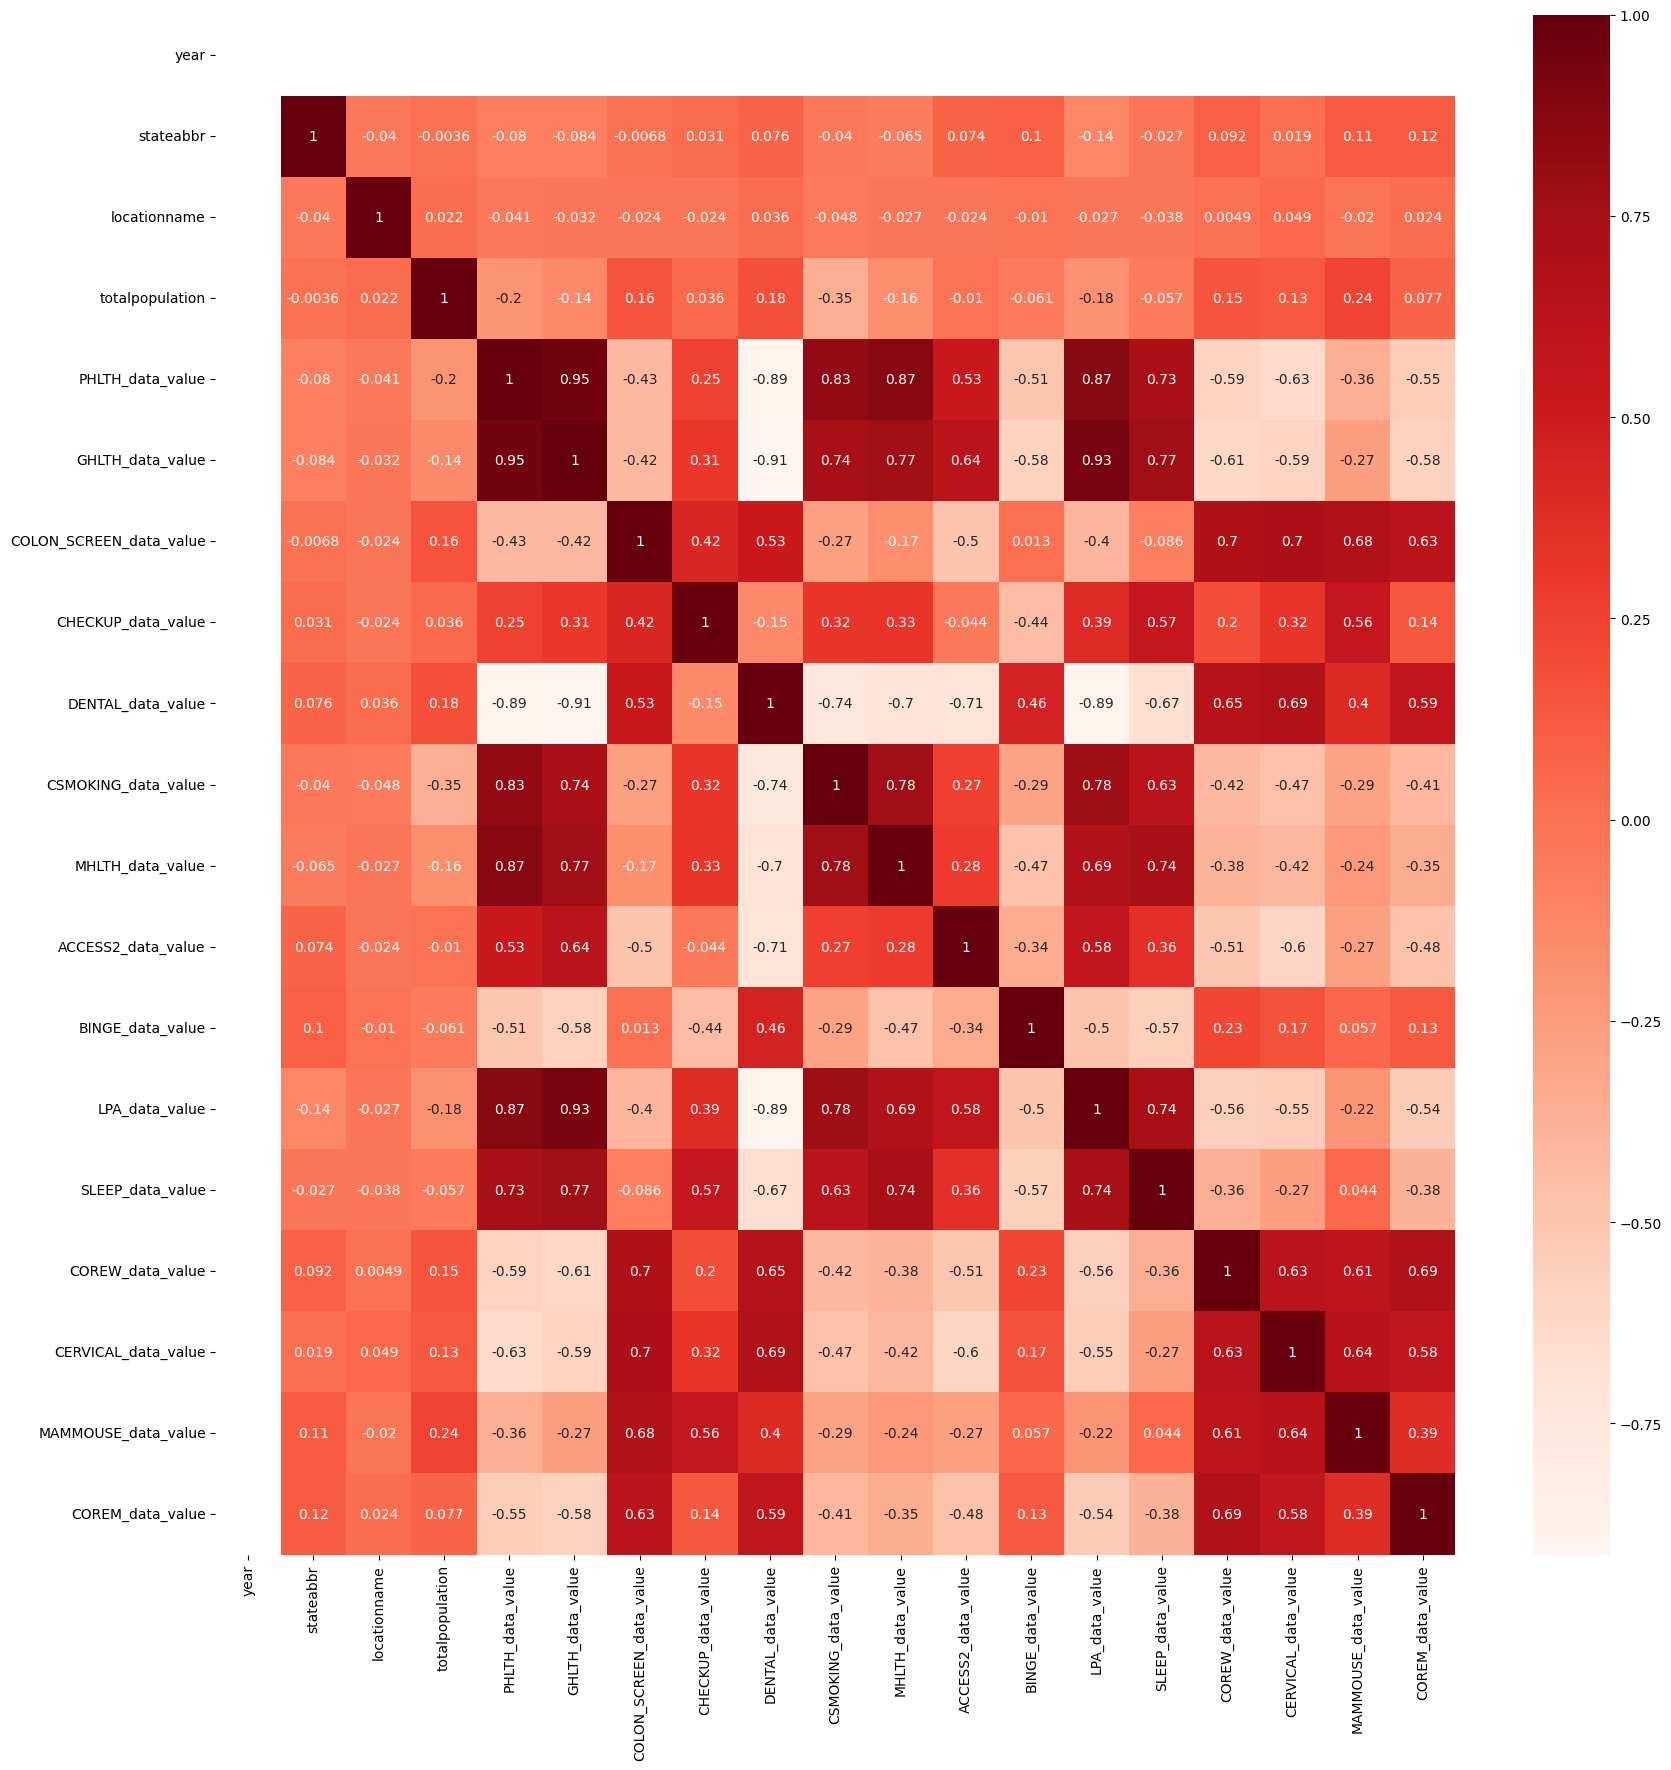

In [118]:
# Import seaborn and matplotlib for pearson correlation
import seaborn as sns
import matplotlib.pyplot as plt
# Create a pearson correlation heatmap
plt.figure(figsize=(20,20))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [119]:
# Create a function to remove highly correlated features
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [120]:
# Call the function to remove highly correlated features
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

5

In [121]:
# View the highly correlated features
corr_features

{'CSMOKING_data_value',
 'DENTAL_data_value',
 'GHLTH_data_value',
 'LPA_data_value',
 'MHLTH_data_value'}

In [122]:
# Drop the highly correlated features
X_train = X_train.drop(corr_features, axis=1)
X_test = X_test.drop(corr_features, axis=1)

In [123]:
# Train the Random Forest Regression model on the training set

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [124]:
# View feature importance
regressor.feature_importances_

array([0.        , 0.01333357, 0.01455565, 0.10489231, 0.02474436,
       0.06036504, 0.07288996, 0.43094581, 0.03359908, 0.02981033,
       0.06873655, 0.02610749, 0.03229521, 0.08772466])

In [125]:
# Create a dataframe of the feature importance
feature_importance_df = pd.DataFrame(regressor.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

# View the dataframe
feature_importance_df

,importance
ACCESS2_data_value,0.430946
totalpopulation,0.104892
COREM_data_value,0.087725
CHECKUP_data_value,0.072890
COREW_data_value,0.068737
COLON_SCREEN_data_value,0.060365
BINGE_data_value,0.033599
MAMMOUSE_data_value,0.032295
SLEEP_data_value,0.029810
CERVICAL_data_value,0.026107


In [126]:
# Predict the results
y_pred = regressor.predict(X_test)

In [127]:
# Evaluate the model
import numpy as np
from sklearn import metrics 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Evaluate the model
from sklearn.metrics import r2_score
print('r2 score: ', r2_score(y_test, y_pred))

Root Mean Squared Error: 0.14261783031851757
r2 score:  0.748902249708586


In [128]:
# Create a dataframe of the actual and predicted values
actual_predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# View the dataframe
actual_predicted_df

,Actual,Predicted
2997,5.9,6.04
423,4.8,5.77
644,6.1,5.81
2481,6.0,6.05
1056,6.2,6.08
...,...,...
1525,6.1,6.03
1035,6.1,6.09
83,6.1,6.10
79,6.0,6.03


In [129]:
# View summary statistics for the predicted results
print(pd.DataFrame(y_pred).describe())

                 0
count  2201.000000
mean      5.895311
std       0.237111
min       4.430000
25%       5.790000
50%       5.990000
75%       6.060000
max       6.200000


In [130]:
# View summary statistics for the actual results
print(pd.DataFrame(y_test).describe())

       CANCER_data_value
count        2201.000000
mean            5.906770
std             0.284676
min             4.300000
25%             5.800000
50%             6.000000
75%             6.100000
max             6.400000
